## Preliminaries 

In [24]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import linear_model

In [2]:
# Load dataset
merged_data = pd.read_csv('merged_train.csv')
merged_data.head()

,State,County,FIPS,Total Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural,Democratic,Republican,Party
0,AZ,apache,4001,72346,18.571863,0.486551,5.947806,1.719515,50.598513,45.854643,13.322091,32460,15.807433,21.758252,88.941063,74.061076,16298,7810,1
1,AZ,cochise,4003,128177,56.299492,3.714395,34.403208,11.458374,49.069646,37.902276,19.756275,45383,8.567108,13.409171,76.837055,36.301067,17383,26929,0
2,AZ,coconino,4005,138064,54.619597,1.342855,13.711033,4.825298,50.581614,48.946141,10.873943,51106,8.238305,11.085381,65.791439,31.466066,34240,19249,1
3,AZ,gila,4007,53179,63.222325,0.552850,18.548675,4.249798,50.296170,32.238290,26.397638,40593,12.129932,15.729958,82.262624,41.062000,7643,12180,0
4,AZ,graham,4009,37529,51.461536,1.811932,32.097844,4.385942,46.313518,46.393456,12.315809,47422,14.424104,14.580797,86.675944,46.437399,3368,6870,0


## Task 1

In [3]:
#Task 1
x_train, x_val, y_train, y_val = train_test_split(merged_data[[
                                                                 'FIPS', 
                                                                 'Total Population', 
                                                                 'Percent White, not Hispanic or Latino', 
                                                                 'Percent Black, not Hispanic or Latino', 
                                                                 'Percent Hispanic or Latino', 
                                                                 'Percent Foreign Born', 
                                                                 'Percent Female', 
                                                                 'Percent Age 29 and Under', 
                                                                 'Percent Age 65 and Older', 
                                                                 'Median Household Income', 
                                                                 'Percent Unemployed', 
                                                                 'Percent Less than High School Degree',
                                                                 "Percent Less than Bachelor's Degree",
                                                                 'Percent Rural']], 
                                                                  merged_data[['Democratic', 'Republican', 'Party']],
                                                                  train_size = .75, 
                                                                  test_size = .25, 
                                                                  random_state = 0)

## Task 2

In [4]:
#Task 2
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled_array = scaler.transform(x_train)
x_val_scaled_array = scaler.transform(x_val)

# convert arrays returned from scaler.transform() into DataFrames for easier column access later
x_train_scaled = pd.DataFrame(data=x_train_scaled_array, columns=['FIPS', 
                                                                 'Total Population', 
                                                                 'Percent White, not Hispanic or Latino', 
                                                                 'Percent Black, not Hispanic or Latino', 
                                                                 'Percent Hispanic or Latino', 
                                                                 'Percent Foreign Born', 
                                                                 'Percent Female', 
                                                                 'Percent Age 29 and Under', 
                                                                 'Percent Age 65 and Older', 
                                                                 'Median Household Income', 
                                                                 'Percent Unemployed', 
                                                                 'Percent Less than High School Degree',
                                                                 "Percent Less than Bachelor's Degree",
                                                                 'Percent Rural'])
x_val_scaled = pd.DataFrame(data=x_val_scaled_array, columns=['FIPS', 
                                                                 'Total Population', 
                                                                 'Percent White, not Hispanic or Latino', 
                                                                 'Percent Black, not Hispanic or Latino', 
                                                                 'Percent Hispanic or Latino', 
                                                                 'Percent Foreign Born', 
                                                                 'Percent Female', 
                                                                 'Percent Age 29 and Under', 
                                                                 'Percent Age 65 and Older', 
                                                                 'Median Household Income', 
                                                                 'Percent Unemployed', 
                                                                 'Percent Less than High School Degree',
                                                                 "Percent Less than Bachelor's Degree",
                                                                 'Percent Rural'])

## Task 3

In [5]:
#Task 3 
# Build model with one predictor for Democratic party
model = linear_model.LinearRegression()
predicted = model.fit(X = x_train_scaled['Percent Female'].values.reshape(-1, 1), y = y_train['Democratic'])
print(predicted.coef_)
print(predicted.intercept_)
model.score(X = x_val_scaled['Percent Female'].values.reshape(-1, 1), y = y_val['Democratic']) # print R squared

[13108.01480235]
27569.37388392861


-0.04396389216761376

In [6]:
# Build model with two predictors for Democratic party
model = linear_model.LinearRegression()
predicted = model.fit(X = x_train_scaled[['Percent Female', 'Percent Age 29 and Under']], y = y_train['Democratic'])
print(predicted.coef_)
print(predicted.intercept_)
model.score(X = x_val_scaled[['Percent Female', 'Percent Age 29 and Under']], y = y_val['Democratic']) # print R squared

[12363.7551377  11720.33971981]
27569.373883928616


0.006932787618006642

In [7]:
# Build model with all predictors (using sklearn) for Democratic party
model = linear_model.LinearRegression()
predicted = model.fit(X = x_train_scaled, y = y_train['Democratic'])
print(predicted.coef_)
print(predicted.intercept_)
model.score(X = x_val_scaled, y = y_val['Democratic']) # print R squared

[-1.29973961e+03  6.91023743e+04 -3.07966185e+03 -8.46872049e+02
 -6.60392331e+03  3.65218018e+03  3.42493472e+02 -5.43113267e+03
 -2.14109622e+03  1.49170954e+03  1.29818765e+03  4.50072694e+03
 -1.08157528e+04 -7.09235223e+00]
27569.37388392856


0.8683081252520788

In [8]:
# Build model with one predictor for Republican party
model = linear_model.LinearRegression()
predicted = model.fit(X = x_train_scaled['Percent Female'].values.reshape(-1, 1), y = y_train['Republican'])
print(predicted.coef_)
print(predicted.intercept_)
model.score(X = x_val_scaled['Percent Female'].values.reshape(-1, 1), y = y_val['Republican']) # print R squared

[8124.30444751]
21546.910714285736


0.005573819984737272

In [9]:
# Build model with two predictors for Republican party
model = linear_model.LinearRegression()
predicted = model.fit(X = x_train_scaled[['Percent Female', 'Percent Age 29 and Under']], y = y_train['Republican'])
print(predicted.coef_)
print(predicted.intercept_)
model.score(X = x_val_scaled[['Percent Female', 'Percent Age 29 and Under']], y = y_val['Republican']) # print R squared

[7684.47359548 6926.3017328 ]
21546.91071428574


0.0516243715609247

In [10]:
# Build model with all predictors (using sklearn) for Republican party
model = linear_model.LinearRegression()
predicted = model.fit(X = x_train_scaled, y = y_train['Republican'])
print(predicted.coef_)
print(predicted.intercept_)
model.score(X = x_val_scaled, y = y_val['Republican']) # print R squared

[-1841.71481358 45294.6191397   1953.44637842 -2891.51669931
  1630.84523366 -6919.31365181  -911.59096508 -1142.09609098
  2172.82809419  5939.95183865  1797.87047734  4186.42433113
 -3576.57045413 -5778.03329044]
21546.910714285706


0.7084055060846924

# Task 4

In [11]:
#using decision tree classfier
classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
classifier.fit(x_train_scaled, y_train['Party'])
print(classifier.tree_.__getstate__()['nodes'])
len(classifier.tree_.__getstate__()['nodes'])

[(  1,  92, 12, -8.03700201e-02, 0.85103407, 896, 896.)
 (  2,   7, 13, -1.57463121e+00, 0.99675236, 328, 328.)
 (  3,   4,  2,  1.39889557e-01, 0.28290479,  61,  61.)
 ( -1,  -1, -2, -2.00000000e+00, 0.        ,  57,  57.)
 (  5,   6,  9,  1.58288693e+00, 0.81127812,   4,   4.)
 ( -1,  -1, -2, -2.00000000e+00, 0.        ,   3,   3.)
 ( -1,  -1, -2, -2.00000000e+00, 0.        ,   1,   1.)
 (  8,  15,  1, -3.45154375e-01, 0.98895258, 267, 267.)
 (  9,  10, 12, -1.85585611e-01, 0.30337484,  37,  37.)
 ( -1,  -1, -2, -2.00000000e+00, 0.        ,  29,  29.)
 ( 11,  12,  0,  7.09241838e-04, 0.81127812,   8,   8.)
 ( -1,  -1, -2, -2.00000000e+00, 0.        ,   5,   5.)
 ( 13,  14,  8,  2.36446482e+00, 0.91829583,   3,   3.)
 ( -1,  -1, -2, -2.00000000e+00, 0.        ,   2,   2.)
 ( -1,  -1, -2, -2.00000000e+00, 0.        ,   1,   1.)
 ( 16,  17,  2, -1.39712286e+00, 1.        , 230, 230.)
 ( -1,  -1, -2, -2.00000000e+00, 0.        ,  10,  10.)
 ( 18,  91, 11,  7.73416497e-02, 0.9985091 , 220

175

In [12]:
y_pred = classifier.predict(x_val_scaled)

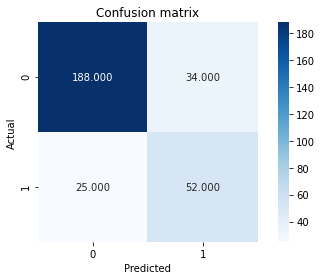

In [13]:
conf_matrix = metrics.confusion_matrix(y_val['Party'], y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [14]:
accuracy = metrics.accuracy_score(y_val['Party'], y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val['Party'], y_pred, average = None)
recall = metrics.recall_score(y_val['Party'], y_pred, average = None)
F1_score = metrics.f1_score(y_val['Party'], y_pred, average = None)
print([accuracy, error, precision, recall, F1_score])

[0.802675585284281, 0.19732441471571904, array([0.88262911, 0.60465116]), array([0.84684685, 0.67532468]), array([0.86436782, 0.63803681])]


In [15]:
#K-nearest neighbors with 3 
classifier = KNeighborsClassifier(n_neighbors = 3)  
classifier.fit(x_train_scaled, y_train['Party'])

KNeighborsClassifier(n_neighbors=3)

In [16]:
y_pred = classifier.predict(x_val_scaled)

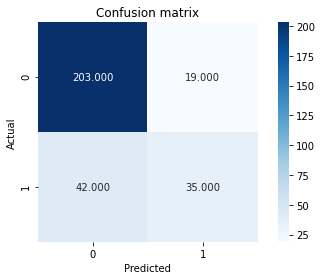

In [17]:
conf_matrix = metrics.confusion_matrix(y_val['Party'], y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [18]:
accuracy = metrics.accuracy_score(y_val['Party'], y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val['Party'], y_pred, average = None)
recall = metrics.recall_score(y_val['Party'], y_pred, average = None)
F1_score = metrics.f1_score(y_val['Party'], y_pred, average = None)
print([accuracy, error, precision, recall, F1_score])

[0.7959866220735786, 0.20401337792642138, array([0.82857143, 0.64814815]), array([0.91441441, 0.45454545]), array([0.86937901, 0.53435115])]


In [19]:
#K-nearest neighbors with 4
classifier = KNeighborsClassifier(n_neighbors = 4)  
classifier.fit(x_train_scaled, y_train['Party'])

KNeighborsClassifier(n_neighbors=4)

In [20]:
y_pred = classifier.predict(x_val_scaled)

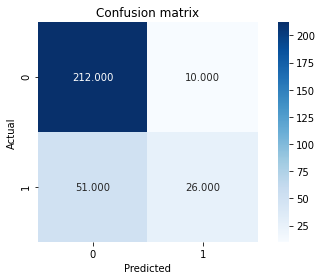

In [21]:
conf_matrix = metrics.confusion_matrix(y_val['Party'], y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [22]:
accuracy = metrics.accuracy_score(y_val['Party'], y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val['Party'], y_pred, average = None)
recall = metrics.recall_score(y_val['Party'], y_pred, average = None)
F1_score = metrics.f1_score(y_val['Party'], y_pred, average = None)
print([accuracy, error, precision, recall, F1_score])

[0.7959866220735786, 0.20401337792642138, array([0.80608365, 0.72222222]), array([0.95495495, 0.33766234]), array([0.8742268 , 0.46017699])]


# Task 5

In [25]:
clustering = linkage(x_val_scaled, method = "single", metric = "euclidean")
clusters = fcluster(clustering, 2, criterion = 'maxclust')

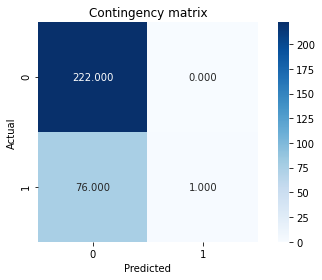

In [26]:
cont_matrix = metrics.cluster.contingency_matrix(y_val['Party'], clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [27]:
adjusted_rand_index = metrics.adjusted_rand_score(y_val['Party'], clusters)
silhouette_coefficient = metrics.silhouette_score(x_val_scaled, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

[0.01254522751329356, 0.5568836666121089]


In [28]:
merged_data['clusters'] = clusters
# ax = merged_data.plot(kind = 'scatter', x = 'Party', y = 'Democratic', c = 'clusters', colormap = plt.cm.brg)
# ax = merged_data.plot(kind = 'scatter', x = 'Party', y = 'Republican', c = 'clusters', colormap = plt.cm.brg)

ValueError: Length of values (299) does not match length of index (1195)

## Task 6

In [ ]:
# Get GeoJSON for US Counties
# Code snippet taken from Choropleth Plotly Express Documentation (https://plotly.com/python/choropleth-maps/)
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

In [ ]:
# Get FIPS to Party mapping
county_party = merged_data.loc[:, ['FIPS', 'Party']]

# Map Party columns as such : {0: 'Republican', 1: 'Democrat'}
county_party['Party'] = county_party['Party'].apply(lambda x: 'Democrat' if x == 1 else 'Republican' if x == 0 else x)

import plotly.express as px

fig = px.choropleth(county_party, geojson=counties, locations='FIPS', color='Party',
                        scope='usa', hover_data=['Party'], 
                        color_discrete_map={
                            'Democrat': 'blue',
                            'Republican': 'red'
                        }
                    )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()